<a href="https://colab.research.google.com/github/simonarahi/AI_HR/blob/master/candidate_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simona Rahi**
### ***Intern at AI Venture Labs*** 

# **Artificial Intelligence in Human Resources**



---










> # **Introduction**



  Artificial Intelligence (AI) refers to technology used to do a task that requires some level of intelligence to accomplish. The differentiators about AI are high-speed computation, huge amount of quality data, and advanced algorithms. AI has transformed the corporate world and introduced it to advanced solutions, and the Human Resouces (HR) department is no exception to this new era of intelligent transformation.

  Merging AI into HR administration functions benefits and improves the overall employee experience, as it would provide more time and budget and more accurate information for decision-making. AI is fueling HR's transition from administrative to strategic to mission critical. Smarter technologies are enabling HR teams to solve critical business challenges, drive exponential performance improvements, and even impact larger business outcomes and profitability.

This report is structured as follows: I start with reporting the market research conducted on the applications of AI in HR areas, then move on to the experiment that focuses on a specific area, and finally conclude with a perspective and some takeaway keypoints.

---




> # **Market Research**

  AI solutions are being implemented into almost all the HR functions; in this project, we identify five key problem areas that have sub-areas and talk briefly about AI implementation in each. These are:

*1. Recruitment:*
AI-centered systems have streamlined iterative tasks in the recruitment process, from lead generation to candidate sourcing and screening to interviews. With smarter solutions, HR can find better fits and the process can take less time, as it would be easier to find a match using advanced algorithms. 

*2. Human Capital Management:*
As employee expectations increase, AI is helping HR teams reimagine people and talent processes to build stronger teams, reduce employee turnover, and enhance the employee experience. Some of the solutions offered optimize performance management and allows for feedback and recognition, as well as manage retention analytics to avoid talent loss. 

*3. Employee Engagement:*
This area is a challenge that HR faces, which makes it essential to leverage the power of AI to connect with employees, get their feedback, and use this feedback to create a meaningful employee engagement strategy. Using sentiment analysis, AI can provide insights into the general mood of employees, their satisfaction with the workflow, and their relationships with their coworkers. 

*4. Employee Benefits & Payroll:*
AI has transformed the employee benefits industry to a more simplified and personalized area, using chatbots is one example. For payroll, AI can automate paycheck anomaly detection as well as assessing and auditing payroll data.

*5. Learning & Development:* 
AI helps in personalizing the corporate training and learning by capturing significant employee data from their behaviors and experience. It recommends when the employee is due for training and what courses or learning paths would be most helpful for each employee.




---





> # **Experiment**



With the market research revealing the different areas and ways that AI is being implemented in HR functions, I focus in my experiment on the recruitment area of HR and specifically candidate screening. Candidate screening is crucial to the recruitment process as it needs to optimize the fit and future performance of the candidate.

Using supervised learning, I attempt to classify the performance of employees based on a several given features including the position, department, payrate, hiring source, sex, race, etc...
To achieve that, I use 5 different classification models and compare their performance metrics to choose the most accurate one.
The goal is to be able to build a model that can predict, to an extent, employee performance based on given data.

This section will cover all the steps of the experiment, including the code and the results. 

## Loading Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import sklearn

from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
import statsmodels.formula.api as smf

from time import time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC 
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from pylab import rcParams
import seaborn as sb

from imblearn.over_sampling import SMOTE

## Loading Data Set

HR data that is available is hard to come across, so the dataset used is from [Kaggle](https://www.kaggle.com/rhuebner/human-resources-data-set) and it is a synthetic dataset designed by Drs. Rich Huebner and Carla Patalano to accompany a case study designed for graduate HR students studying HR metrics, measurement, and analytics.

The data revolves around a fictitious company, called Dental Magic, and it contains several features that we will explore below.

To import the data to google colab from a local drive, I use the two lines of code below, then I read the data into a pandas dataframe.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_dataset.csv to HR_dataset.csv


In [ ]:
HR = pd.read_csv(io.BytesIO(uploaded['HR_dataset.csv']))

Let's take a look at the first 5 rows of our dataset.

In [ ]:
HR.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,09/01/86,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,09/16/85,F,Married,US Citizen,No,White,2/16/2015,04/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,05/19/88,F,Single,US Citizen,No,White,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


## Data Exploration

It is important to explore the data at hand to know how to handle it. First we look at the columns we have and the type of data they contain, as well as the number of observations. 

We have a total of 35 columns/features, with two different types: float64 and object. The total number of observations is 401. As we can see, all columns contain null values (none of them has 401 non-null) that we will deal with later.

One column we focus on is "Performance Score" which is a categorical variable of 4 levels in decreasing order: Exceeds, Fully Meets, Needs Improvement, and PIP (performance improvement plan).

In [ ]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               310 non-null    object 
 1   EmpID                       310 non-null    float64
 2   MarriedID                   310 non-null    float64
 3   MaritalStatusID             310 non-null    float64
 4   GenderID                    310 non-null    float64
 5   EmpStatusID                 310 non-null    float64
 6   DeptID                      310 non-null    float64
 7   PerfScoreID                 310 non-null    float64
 8   FromDiversityJobFairID      310 non-null    float64
 9   PayRate                     310 non-null    float64
 10  Termd                       310 non-null    float64
 11  PositionID                  310 non-null    float64
 12  Position                    310 non-null    object 
 13  State                       310 non

Now let's look at some information revealed from our data. First, we plot the average payrate for Female vs Male. The graph shows around $5 higher average pay for Males.

Text(0, 0.5, 'Avg Pay Rate')

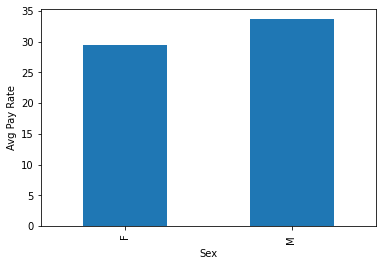

In [ ]:
plot1 = HR.groupby(['Sex']).mean().PayRate.plot(kind='bar')
plot1.set_ylabel("Avg Pay Rate")

Another thing to look at is our column of interest: Performance Score. The barplot shows the distribution of performance scores for males vs females. First thing to note is that the number of females is higher than males, as the height of the bar is higher for females. A second thing is that the distribution is about the same, where we see that the largest category of performance is "fully meets", followed by "exceeds".

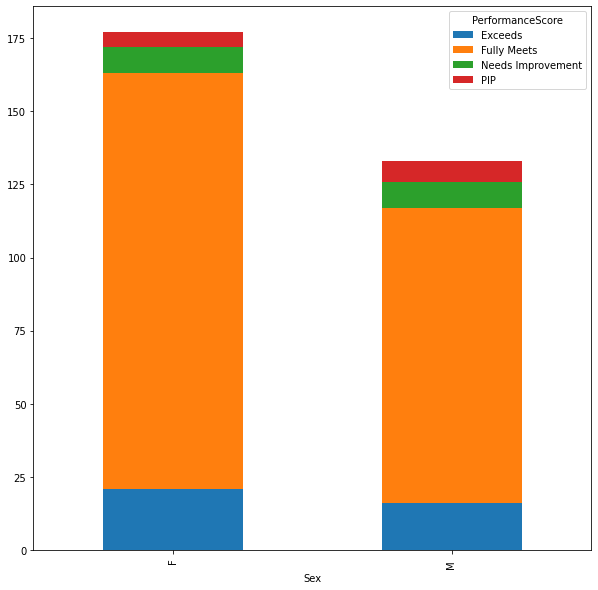

In [ ]:
HR.groupby(['Sex', 'PerformanceScore']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,10))





Looking at performance scores regardless of gender, the graph below shows the counts of instances per class. As seen before, the largest class is "Fully Meets", with a much higher count than the rest of the classes combined. This could be an indication of an imbalanced dataset which we'll deal with later too.


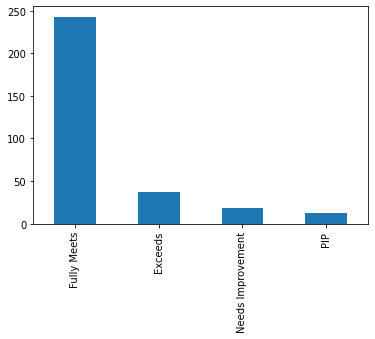

In [ ]:
HR['PerformanceScore'].value_counts().plot(kind='bar')

The quantitative variables that we have in the dataset are: payrate, engagement survey, employee satisfaction, and special project counts. Therefore, I get the pairwise relationships between them to check if there are any strong correlations. All correlations are small (less than 0.5) but reveal some interesting directions. On average, employees with higher payrates reported higher satisfaction, but a higher payrate is associated with a lower engagement.

In [ ]:
HRquant = HR.filter(['PayRate','EngagementSurvey','EmpSatisfaction', 'SpecialProjectCounts'], axis=1)
HRquant.corr()

,PayRate,EngagementSurvey,EmpSatisfaction
PayRate,1.000000,-0.024223,0.061525
EngagementSurvey,-0.024223,1.000000,-0.017123
EmpSatisfaction,0.061525,-0.017123,1.000000


## Data Preprocessing

In this section, I prepare the data for the classification models and perform any necessary cleaning.

I start by dropping the columns that will not be relevant to the model (zip code, state, manager name, ...) or that are repetetive. I drop "Performance Score" and keep the column PerfScoreID which is the code that matches the employee’s most recent performance score. 

In [ ]:
HR = pd.read_csv(io.BytesIO(uploaded['HR_dataset.csv']))

In [ ]:
HR.drop(columns=['GenderID', 'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID',
                 'EmpStatusID','DeptID', 'PositionID', 'DOB','State', 'Zip', 'CitizenDesc', 
                 'HispanicLatino', 'DateofHire', 'DateofTermination', 'TermReason', 
                 'ManagerName', 'ManagerID', 'LastPerformanceReview_Date', 
                 'DaysLateLast30', 'PerformanceScore'], inplace=True)

Regarding the missing values, I plot the count of missing values for our remaining columns, and we can see that they all have the same count of 91 missing values. The NAs are dropped.

Text(0.5, 1.0, 'Missing values in the dataset')

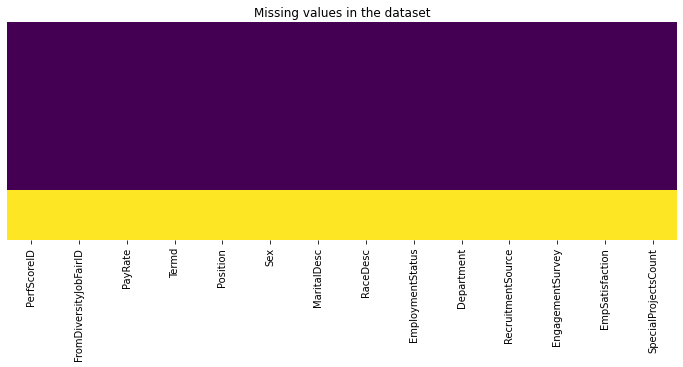

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(HR.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values in the dataset')

In [ ]:
HR.info()
HR.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PerfScoreID             310 non-null    float64
 1   FromDiversityJobFairID  310 non-null    float64
 2   PayRate                 310 non-null    float64
 3   Termd                   310 non-null    float64
 4   Position                310 non-null    object 
 5   Sex                     310 non-null    object 
 6   MaritalDesc             310 non-null    object 
 7   RaceDesc                310 non-null    object 
 8   EmploymentStatus        310 non-null    object 
 9   Department              310 non-null    object 
 10  RecruitmentSource       310 non-null    object 
 11  EngagementSurvey        310 non-null    float64
 12  EmpSatisfaction         310 non-null    float64
 13  SpecialProjectsCount    310 non-null    float64
dtypes: float64(7), object(7)
memory usage: 44.

To deal with the categorical nominal variables, I encode them using "get_dummies" from pandas, which creates dummy variables from them. Now we end up with a total of 86 columns/features.

In [ ]:
HR1 = pd.get_dummies(HR, columns=['Sex', 'Position', 'MaritalDesc', 'RaceDesc',
                                 'EmploymentStatus', 'Department', 'RecruitmentSource'])

The response variable is PerfScoreID. It is an ordinal variable with 4 levels: 1 refers to PIP, 2 needs improvement, 3 fully meets, and 4 exceeds. So I assign Y to our response PerfScoreID and the remaining columns are assigned to x.

In [ ]:
x = HR1.iloc[:,1:].values
Y = HR1.iloc[:, 0].values
print(x.shape)
print(Y.shape)

(310, 85)
(310,)


Then I split the data into 25% test set and 75% training set.

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=0)

Since we had detectred earlier some imbalance in the dataset, I calculate Shannon's entropy to further validate this observation. The balance is calculated by dividing the entropy by the log of the number of classes (4). 
We get an entropy of 0.73 and the balance is 0.5; this indicates some imbalance. A value of 1 indicates balance and a value of 0 indicates imbalance.

In [ ]:
from scipy.stats import entropy
pd_series = pd.Series(HR1['PerfScoreID'])
counts = pd_series.value_counts()
entropy = entropy(counts)
balance = entropy/np.log(4)

print(entropy)
print(balance)

0.7357224105786224
0.5307115366063262


To handle imbalanced classes, I use SMOTE (Synthetic Minority Oversampling Technique) which oversamples minority classes in the training set. The number of observations is now increased to 404 compared to 301.

In [ ]:
smote = SMOTE('minority')

x_sm, Y_sm = smote.fit_sample(x_train, Y_train)
print(x_sm.shape, Y_sm.shape)

(404, 85) (404,)


The last preprocessing to be done is scaling the features since we have different units that the variables were measured in. The payrate was measured in dollars, the performance score is a scale from 1 to 4, etc...

In [ ]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
ss_x_train = ss_X.fit_transform(x_sm)
ss_x_test = ss_X.transform(x_test)

## Models

In this section, I will implement 5 different classification models to predict performance score. This will be a multiclass classification problem.

### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
rf.fit(ss_x_train, Y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
rf_pred = rf.predict(ss_x_test)

Accuracy score: 0.782051282051282
Precision score: 0.782051282051282
Recall score: 0.782051282051282


Text(91.68, 0.5, 'Predicted Values')

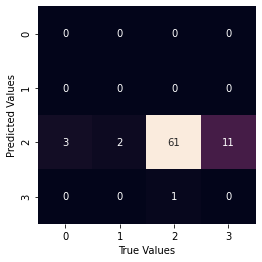

In [ ]:
rf_accuracy = metrics.accuracy_score(Y_test, rf_pred) 
print("Accuracy score:",rf_accuracy)
precision = metrics.precision_score(Y_test, rf_pred, average='micro') 
print("Precision score:",precision)
recall = metrics.recall_score(Y_test, rf_pred, average='micro') 
print("Recall score:",recall)

mat = confusion_matrix(Y_test,rf_pred)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

The first classifier is the random forest and it reached an accuracy of 78.2%. I use a confusion matrix to best show where the classification went wrong. We can see that most of the performances were predicted as 2 (which is "fully meets"), and that is what is being misclassified.

### Naive Bayes

In [ ]:
gnb = GaussianNB().fit(ss_x_train, Y_sm)

In [ ]:
gnb_predictions = gnb.predict(ss_x_test)

Accuracy Score: 0.28205128205128205


Text(91.68, 0.5, 'Predicted Values')

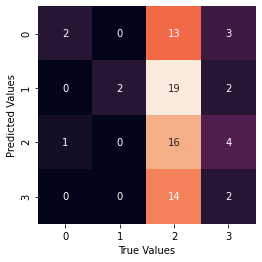

In [ ]:
print('Accuracy Score:', accuracy_score(Y_test, gnb_predictions))
mat = confusion_matrix(Y_test,gnb_predictions)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

The second classifier is Naive Bayes which achieved a low accuracy of 28.2%. The confusion matrix reveals that the true value of 2 was being confused for all other values. This is the opposite case of the random forest. 

### Support Vector Machine (SVM)

In [ ]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(ss_x_train, Y_sm) 
svm_predictions = svm_model_linear.predict(ss_x_test) 

# model accuracy  
svm_accuracy = svm_model_linear.score(ss_x_test, Y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(Y_test, svm_predictions)

Accuracy Score: 0.717948717948718


Text(91.68, 0.5, 'Predicted Values')

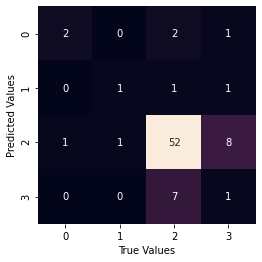

In [ ]:
print('Accuracy Score:', svm_accuracy)
mat = confusion_matrix(Y_test,svm_predictions)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

The third classifier is the SVM which achieved an accuracy of 71.79%. The confusion matrix shows a slightly better classification than the previous classifiers. It also shows a similar trend where classes 2 and 3 are being confused, these are "fully meets" and "exceeds". 

### k-Nearest Neighbor

Text(0, 0.5, 'Testing Accuracy')

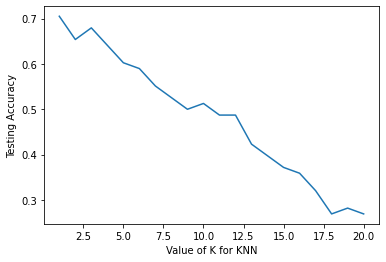

In [ ]:
# to check which k gives the highest accuracy
k_range = range(1,21)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(ss_x_train, Y_sm)
  knn_pred=knn.predict(ss_x_test)
  scores[k] = metrics.accuracy_score(Y_test, knn_pred)
  scores_list.append(metrics.accuracy_score(Y_test, knn_pred))


plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
 knn = KNeighborsClassifier(n_neighbors = 1).fit(ss_x_train, Y_sm)

Accuracy Score: 0.7051282051282052


Text(91.68, 0.5, 'Predicted Values')

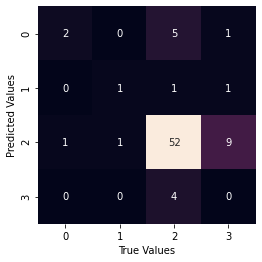

In [ ]:
knn_accuracy = knn.score(ss_x_test, Y_test)
knn_predictions = knn.predict(ss_x_test)  
print('Accuracy Score:', knn_accuracy)
mat = confusion_matrix(Y_test,knn_predictions)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

The fourth classifier is the kNN. I start by testing the accuracy on different numbers of neighbors (k) to check which level would perform better. The accuracy keeps declining with larger k values, so I use 1 as as k by hypertuning the parameters of the kNN model. 
The accuracy reached is 70.75%. 

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state=0, solver="liblinear")
logistic_classifier.fit(ss_x_train, Y_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logistic_pred = logistic_classifier.predict(ss_x_test)

Accuracy: 0.7435897435897436
Precision score: 0.3695652173913043
Recall score: 0.4341397849462365


Text(91.68, 0.5, 'Predicted Values')

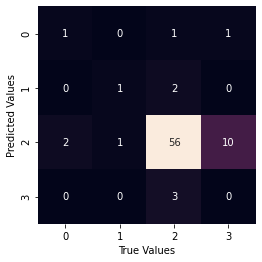

In [ ]:
logistic_accuracy = metrics.accuracy_score(Y_test, logistic_pred) 
print("Accuracy:",logistic_accuracy)
precision = metrics.precision_score(Y_test, logistic_pred, average='macro') 
print("Precision score:",precision)
recall = metrics.recall_score(Y_test, logistic_pred, average='macro') 
print("Recall score:",recall)

mat = confusion_matrix(Y_test,logistic_pred)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

The last classifier is the logistic regression. The accuracy reached is 74.35%. From the confusion matrix, we see that most misclassifications are 3 (exceeds) being confused for 2 (fully meets).

## Comparison of Performances Across Models

In [ ]:
comparisons = {'Classifier':  ['Random Forest', 'Naive Bayes', 'Support Vector Machine', 'k-Nearest Neighbor', 'Logistic Regression'],
        'Accuracy': [rf_accuracy, accuracy_score(Y_test, gnb_predictions), svm_accuracy, knn_accuracy, logistic_accuracy]
        }

df = pd.DataFrame(comparisons, columns = ['Classifier','Accuracy'])
df

,Classifier,Accuracy
0,Random Forest,0.782051
1,Naive Bayes,0.282051
2,Support Vector Machine,0.717949
3,k-Nearest Neighbor,0.705128
4,Logistic Regression,0.743590


Comparing the 5 models, the random forest tops the rest with the highest accuracy of 79.48%. The SVM, kNN, and logistic are close in the low 70s accuracy. However, the Naive Bayes was the lowest with a large difference at 28% accuracy. The dependence of features could be an explanatory factor behind this low accuracy since the Naive Bayesian classifier assumes the opposite.



## Azure AutoML



In addition to running these models in the notebook, I used Microsoft Azure Machine Learning to run an automated ML on the same dataset. I used the data after the preprocessing so that it would be the same data being fed into the models I ran previously. This experiment runs many classifiers and displays all the models in decreasing order of performance. I chose the target metric to be the accuracy score, so that was the performance metric used to assess the models. The models that got the highest accuracy were Extreme Random Forest, SVM, and GBM with a tie at 90.47%. 

The algorithm of Extreme Random Forest is very similar to the Random Forest, which was also our top performer, but with more randomness. The normalization used on the features was the standard scaler, which transforms the data in a way that its distribution will have a mean of 0 and standard deviation of 1. 

All models used 100% sampling, and the top 5 are:


1. Extreme Random Trees using standard scaler
2. SVM using min max scaler
3. LightGBM using standard scaler
4. LightGBM using min max scaler
5. LightGBM using robust scaler



---





> # **Conclusion & Perspective**





In conclusion, the experiments run were able to classify, to an extent, the performance score of employees based on given data. This could be part of a bigger picture and larger application where HR can try to predict future performance based on known features of the candidate.

For future work, I would look into a larger dataset that could help with better classifications, as well as further balancing the classes because, as we saw, there was a bias in classifying the performance level "fully meets".  
It is also important to note that bias could be present in this model since it is also learning from demographic information such as sex and race, so for future work I would look into auditing the model and quantifying any bias present and try to minimize it. This is also an issue that has been faced with applying AI in recruitment without checking for model bias.

AI is disrupting the HR department in almost all of its areas and allowing inefficiencies in the traditional system to be solved. The ideal strategy however is to employ AI in HR management by using AI software to analyze the data collected and leave the decision-making to the human staff. By the end of the day, we can’t take human from Human Resources, so it is advisable for executives to have the final word in decisions with the help of the tools provided by AI.
Some barriers for the workforce to adapt AI solutions could be worries about complexity as well as data security and privacy. Therefore, AI companies and startups must explain how they are using AI ethically as well as offer solutions to address security and privacy concerns.
AI is still developing, and the era of digital transformation is still maturing, so what is next for the HR?


---

